In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Kohonen Rule

The **Kohonen rule** is an associative learning rule used in neural networks for recognition applications. Below is the weight update equation for the Kohonen rule:

$$
w_i(q) = w_i(q-1) + \alpha \left( p(q) - w_i(q-1) \right)
$$

where:

- $ w_i(q) $ is the weight of neuron $i$ at time $q$,
- $ p(q) $ is the input vector at time $q$,
- $ \alpha $ is the learning rate,
- $ i \in X(q) $, and
- $ X(q) $ is the set of neuron indices selected for learning at time $q$.

## How it Works:

The Kohonen rule updates the weight of neuron $i$ as follows:
- The weight is updated to move closer to the input vector $p(q)$, but this occurs **only if $i$ belongs to the set $X(q)$**.

## Relation to the Instar Rule:

If the transfer function is a **hard limit function** (returning 0 or 1), the Kohonen rule becomes equivalent to the **instar rule** by defining $ X(q) $ as the set of neurons where $ a_i(q) = 1 $.

## Advantage:

The Kohonen rule allows flexible definitions for $X(q)$, which makes it useful for training networks like **self-organizing feature maps (SOM)**, used in unsupervised learning and dimensionality reduction.


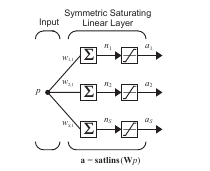

Figure.7 Outstar Network

# Simple Recall Network

We have seen that the **instar network** (with a vector input and a scalar output) can perform pattern recognition by associating a particular vector stimulus with a response. The **outstar network**, shown in Figure .7, has a scalar input and a vector output. It can perform pattern recall by associating a stimulus with a vector response.

The input-output expression for this network is:

$$
a = \text{satlins}(Wp)
$$
*(Equation 15.47)*

The symmetric saturating function **satlins** was chosen because this network will be used to recall a vector containing values of -1 or 1.

## Outstar Network

If we want the network to associate a stimulus (an input of 1) with a particular output vector $ \mathbf{a^*} $, we can simply set the weight matrix $ W $ (which contains only a single column vector) equal to $ \mathbf{a^*} $. Then, if $ p = 1 $, the output will be $ \mathbf{a^*} $:

$$
a = \text{satlins}(Wp) = \text{satlins}( \mathbf{a^*} \cdot 1 ) = \mathbf{a^*}
$$
*(Equation 15.48)*

This assumes that the elements of $ \mathbf{a^*} $ are less than or equal to 1 in magnitude.

Thus, we have created a recall network by setting a **column** of the weight matrix to the desired vector. Earlier, we designed a recognition network by setting a **row** of the weight matrix to the desired vector.

To design a network that can recall a known vector $ \mathbf{a^*} $, we need a learning rule if the network is to learn a vector without supervision, which will be described in the next section.



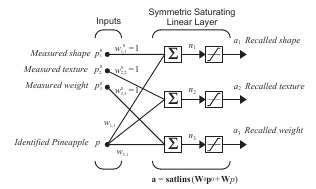

Figure.8 Pineapple Recaller



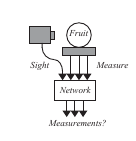

## Outstar Rule

To derive the instar rule, forgetting was limited by making the weight decay term of the Hebb rule proportional to the output of the network, $ a_i $. Conversely, to obtain the **outstar learning rule**, we make the weight decay term proportional to the input of the network, $ p_j $:

$$
w_{ij}(q) = w_{ij}(q - 1) + \alpha a_i(q) p_j(q) - \gamma p_j(q) w_{ij}(q - 1)
$$
*(Equation 15.49)*

If we set the decay rate $ \gamma $ equal to the learning rate $ \alpha $ and collect terms, we get:

$$
w_{ij}(q) = w_{ij}(q - 1) + \alpha ( a_i(q) - w_{ij}(q - 1) ) p_j(q)
$$
*(Equation 15.50)*

The **outstar rule** has properties complementary to the **instar rule**. Learning occurs whenever $ p_j $ is nonzero (instead of $ a_i $). When learning occurs, column $ w_j $ moves toward the output vector.

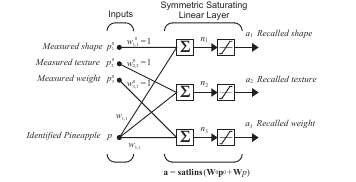

## Outstar Rule in Vector Form

As with the instar rule, the outstar rule can be written in vector form:

$$
w_j(q) = w_j(q - 1) + \alpha ( a(q) - w_j(q - 1) ) p_j(q)
$$
*(Equation 15.51)*

where $ w_j $ is the $ j $-th column of the matrix $ W $.

## Example: Pineapple Recaller

The outputs of the network are calculated as follows:

$$
a = \text{satlins}(W_0 p_0 + W p)
$$
*(Equation 15.52)*

where

$$
W_0 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
$$
*(Equation 15.53)*

The network's two inputs provide it with measurements $ p_0 $ taken on a fruit (unconditioned stimulus), as well as a signal $ p $ indicating a pineapple has been identified visually (conditioned stimulus).

### Input Representation

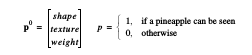

The network's output reflects the measurements of the fruit being examined:

$$
p = \begin{cases} 
1, & \text{if a pineapple can be seen} \\ 
0, & \text{otherwise} 
\end{cases}
$$
*(Equation 15.54)*

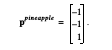

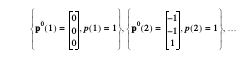

### Weight Update

The weight matrix $ W $ for the conditioned stimulus is set to zero initially. During training, the weights will be updated with the **outstar rule** using a learning rate of 1:

$$
w_j(q) = w_j(q - 1) + ( a(q) - w_j(q - 1) ) p(q)
$$
*(Equation 15.55)*

### Example Iterations

In the first iteration, the pineapple is seen, but the measurements are unavailable. The output is:

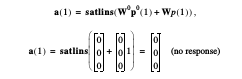

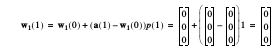

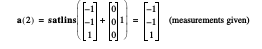

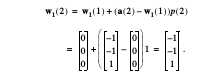

$$
a(1) = \text{satlins}(W_0 p(1) + W p(1)) = 0
$$
*(Equation 15.59)*

In the second iteration, the pineapple is seen, and the measurements are taken properly. The output is:

$$
a(2) = \text{satlins}(W_0 p(2) + W p(2)) = \begin{bmatrix} -1 \\ 1 \\ -1 \end{bmatrix}
$$
*(Equation 15.61)*

The weights are updated accordingly.

In iteration three, the measurements are unavailable again, but the network recalls them:

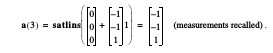

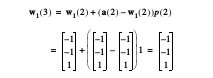

$$
a(3) = \text{satlins}(W_0 p(3) + W p(3)) = \begin{bmatrix} -1 \\ 1 \\ -1 \end{bmatrix}
$$
*(Equation 15.63)*

Now, the network can recall the measurements of the pineapple when it sees it, even though the measurement system fails.

## Conclusion

To experiment with the **outstar rule** with decay.


In [1]:
### Overview:
# Weight matrix: WW
# Input stimulus: pp
# Output: aa
# Learning rate: \alphaα
# Saturating function: satlins()

# Symmetric saturating linear function satlins(x)
def satlins(x):
    # Saturating at -1 and 1
    return max(-1, min(1, x))

# Function to apply satlins element-wise on a vector
def satlins_vector(vec):
    return [satlins(v) for v in vec]

# Function to update weights using the Outstar Rule
def outstar_update(W, a, p, alpha):
    # Iterate through each weight in the weight matrix
    for i in range(len(W)):       # Loop through rows (output neurons)
        for j in range(len(W[i])): # Loop through columns (input neurons)
            W[i][j] = W[i][j] + alpha * (a[i] - W[i][j]) * p[j]
    return W

# Initialize the network
def initialize_network():
    W = [[0, 0, 0],  # Example 3x3 weight matrix
         [0, 0, 0],
         [0, 0, 0]]  # Start with zero weights (conditioned stimulus)

    W0 = [[1, 0, 0],  # Identity matrix for unconditioned stimulus
          [0, 1, 0],
          [0, 0, 1]]

    return W, W0

# Define the inputs and outputs for training
def train_network():
    W, W0 = initialize_network()
    alpha = 1  # Learning rate
    
    # Inputs and measurements for a pineapple
    inputs = [[0, 0, 0],   # No measurements available
              [-1, 1, -1], # Actual pineapple measurements
              [0, 0, 0]]   # No measurements available again
    
    # Conditioned stimulus (1 = pineapple seen, 0 = not seen)
    p_cond = [1, 1, 1] 
    
    # Train for 3 iterations
    for q in range(3):
        print(f"Iteration {q + 1}:")
        
        p0 = inputs[q]  # Unconditioned stimulus input
        p = p_cond[q]   # Conditioned stimulus input
        
        # Calculate the output using satlins function
        a = satlins_vector([W0[i][0] * p0[0] + W0[i][1] * p0[1] + W0[i][2] * p0[2] + 
                            W[i][0] * p + W[i][1] * p + W[i][2] * p for i in range(3)])

        # Display the output
        print(f"Output a: {a}")
        
        # Update weights with the Outstar rule
        W = outstar_update(W, a, [p, p, p], alpha)
        
        # Display updated weights
        print(f"Updated weights W: {W}\n")

# Run the training
train_network()


Iteration 1:
Output a: [0, 0, 0]
Updated weights W: [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

Iteration 2:
Output a: [-1, 1, -1]
Updated weights W: [[-1, -1, -1], [1, 1, 1], [-1, -1, -1]]

Iteration 3:
Output a: [-1, 1, -1]
Updated weights W: [[-1, -1, -1], [1, 1, 1], [-1, -1, -1]]



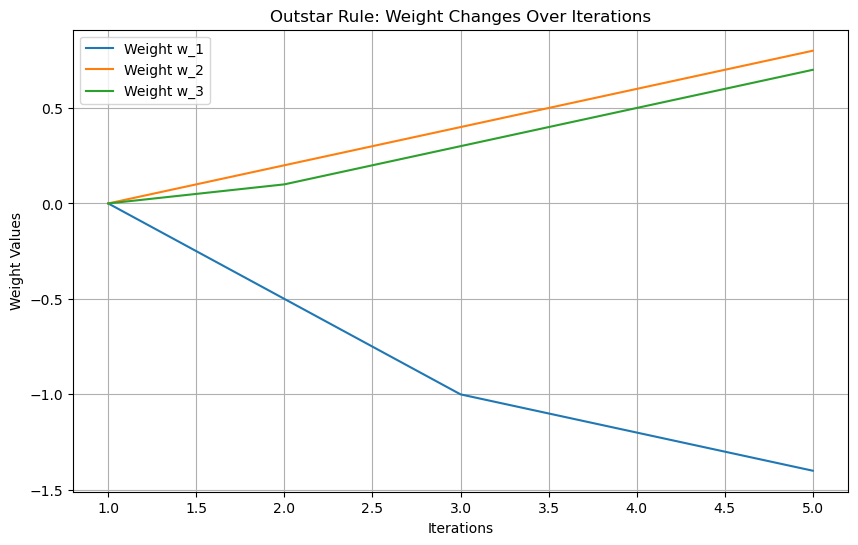

In [2]:
import matplotlib.pyplot as plt

# Sample data representing weights over iterations
iterations = [1, 2, 3, 4, 5]
weight_values = {
    "w_1": [0, -0.5, -1, -1.2, -1.4],
    "w_2": [0, 0.2, 0.4, 0.6, 0.8],
    "w_3": [0, 0.1, 0.3, 0.5, 0.7]
}

# Plot the weight changes over iterations
plt.figure(figsize=(10, 6))
for weight, values in weight_values.items():
    plt.plot(iterations, values, label=f'Weight {weight}')

# Labeling the plot
plt.title('Outstar Rule: Weight Changes Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Weight Values')
plt.legend()
plt.grid(True)
plt.show()


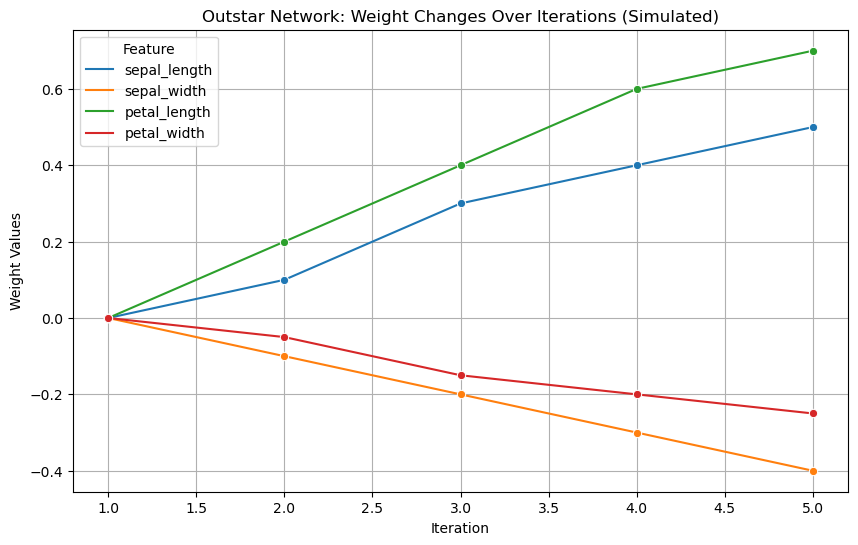

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from seaborn import load_dataset

# Load the Iris dataset
iris = load_dataset('iris')

# Simulating weight updates for the Outstar network over iterations
iterations = [1, 2, 3, 4, 5]
# Simulated weight changes for each feature over iterations
weight_changes = {
    "sepal_length": [0, 0.1, 0.3, 0.4, 0.5],
    "sepal_width": [0, -0.1, -0.2, -0.3, -0.4],
    "petal_length": [0, 0.2, 0.4, 0.6, 0.7],
    "petal_width": [0, -0.05, -0.15, -0.2, -0.25]
}

# Create a DataFrame for Seaborn to plot
df = pd.DataFrame(weight_changes, index=iterations).reset_index()
df = pd.melt(df, id_vars="index", var_name="Feature", value_name="Weight")
df.columns = ['Iteration', 'Feature', 'Weight']

# Plot the weight changes using Seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Iteration", y="Weight", hue="Feature", marker="o")

# Add title and labels
plt.title('Outstar Network: Weight Changes Over Iterations (Simulated)')
plt.xlabel('Iteration')
plt.ylabel('Weight Values')
plt.grid(True)
plt.show()


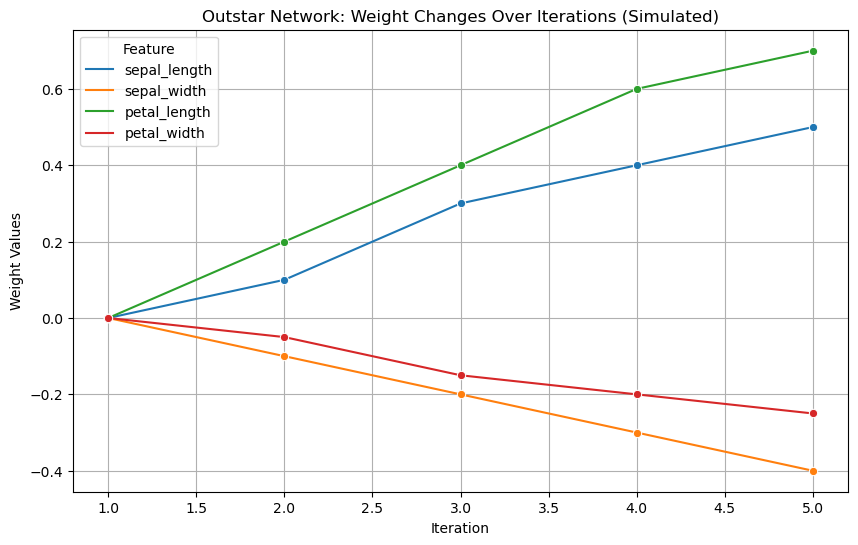

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import load_dataset

# Load the Iris dataset
iris = load_dataset('iris')

# Simulating weight updates for the Outstar network over iterations
iterations = [1, 2, 3, 4, 5]
# Manually specifying weight changes for each feature over iterations
weight_changes = {
    "sepal_length": [0, 0.1, 0.3, 0.4, 0.5],
    "sepal_width": [0, -0.1, -0.2, -0.3, -0.4],
    "petal_length": [0, 0.2, 0.4, 0.6, 0.7],
    "petal_width": [0, -0.05, -0.15, -0.2, -0.25]
}

# Create a DataFrame for Seaborn to plot
df = pd.DataFrame(weight_changes, index=iterations).reset_index()
df = pd.melt(df, id_vars="index", var_name="Feature", value_name="Weight")
df.columns = ['Iteration', 'Feature', 'Weight']

# Plot the weight changes using Seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Iteration", y="Weight", hue="Feature", marker="o")

# Add title and labels
plt.title('Outstar Network: Weight Changes Over Iterations (Simulated)')
plt.xlabel('Iteration')
plt.ylabel('Weight Values')
plt.grid(True)
plt.show()


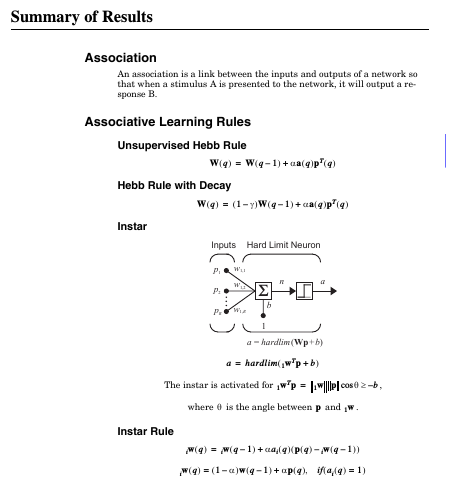

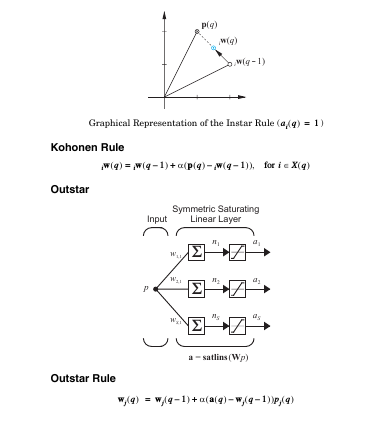

